<a href="https://colab.research.google.com/github/Nram94/simulacion-modelacion-python/blob/main/Semana05_ModelosEmpiricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 **Ejemplo Práctico: Optimización de la Viscosidad de una Emulsión**

---

### 🧴 **Escenario Industrial**

Se está desarrollando una **emulsión corporal** donde la **viscosidad final** $Y$ es crítica para la sensación en la piel.  
Se sospecha que la **temperatura máxima de mezclado** $X$ durante la emulsificación afecta esta propiedad.  

El equipo de **I+D** ha realizado **15 pruebas** variando la temperatura y midiendo la viscosidad.

---

### 🧠 **Hipótesis Fenomenológica Subyacente**

La relación entre la temperatura y la viscosidad es **exponencial**,  
ya que el aumento de temperatura generalmente acelera la degradación  
o altera la estructura de las micelas.




### 📊 **Datos Experimentales**

| Temperatura $X$ (°C) | Viscosidad $Y$ (cP) |
|:--------------------:|:-------------------:|
| 50  | 18 100 |
| 55  | 17 200 |
| 60  | 16 500 |
| 65  | 15 800 |
| 70  | 14 900 |
| 75  | 14 000 |
| 80  | 13 000 |
| 85  | 12 200 |
| 90  | 11 300 |
| 95  | 10 500 |
| 100 | 9 800  |
| 105 | 9 000  |
| 110 | 8 300  |
| 115 | 7 600  |
| 120 | 7 000  |

---


### 🧮 **Paso 2: Ejercicio de Regresión con Múltiples Modelos**

Los estudiantes deben ajustar los siguientes cuatro modelos empíricos a la data:

1. **Modelo Lineal:**  
   $$
   Y = \beta_0 + \beta_1 X
   $$

2. **Modelo Polinomial (Grado 2):**  
   $$
   Y = \beta_0 + \beta_1 X + \beta_2 X^2
   $$

3. **Modelo Exponencial (Linealizado):**  
   $$
   \ln(Y) = \beta_0 + \beta_1 X
   \implies
   Y = e^{\beta_0} e^{\beta_1 X}
   $$

4. **Modelo Potencia (Linealizado):**  
   $$
   \ln(Y) = \beta_0 + \beta_1 \ln(X)
   \implies
   Y = e^{\beta_0} X^{\beta_1}
   $$



--- COMPARACIÓN DE MÉTRICAS DEL MODELADO EMPÍRICO ---
Modelo | R^2 | RMSE (cP) | MAE (cP) | MAPE (%)
-------------------------------------------------------
Lineal     | 0.9980 | 0.16 | 0.13 | 1.26
Polinomial | 0.9989 | 0.11 | 0.10 | 0.80
Exponencial | 0.9870 | 0.40 | 0.32 | 2.52
Potencia   | 0.9400 | 0.86 | 0.70 | 5.59


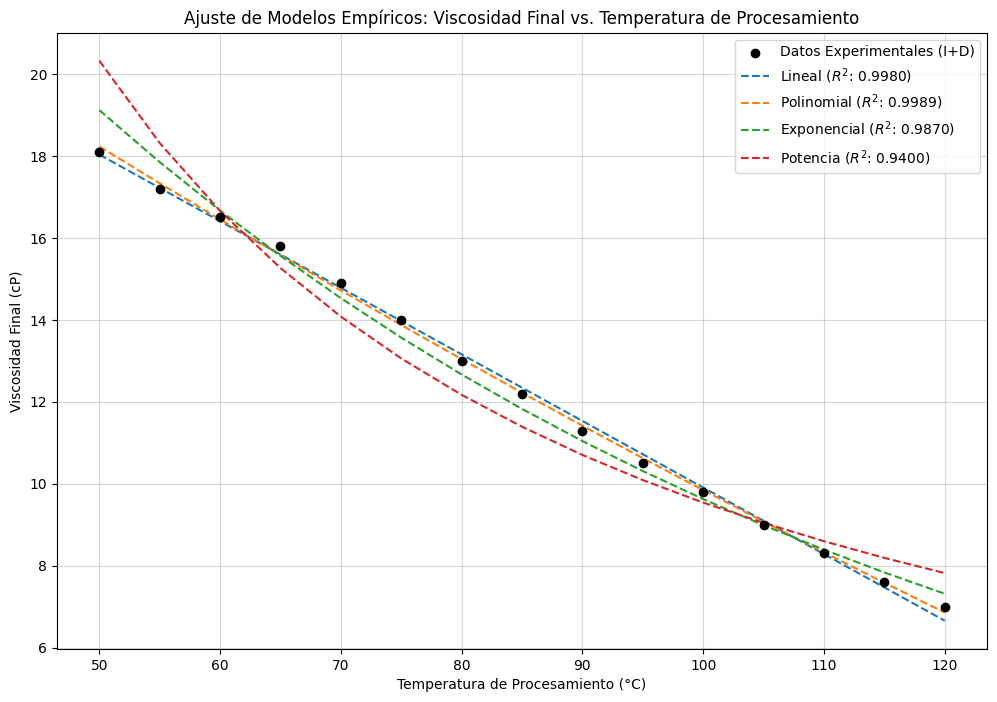

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# =============================================================================
# 1. DEFINICIÓN DE LAS MÉTRICAS DE VALIDACIÓN
# =============================================================================
def mean_absolute_percentage_error(y_true, y_pred):
    """Calcula el Error Porcentual Absoluto Medio (MAPE) de forma robusta."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Evita la división por cero si y_true contiene ceros.
    # Se usa una pequeña constante (epsilon) si fuera necesario,
    # pero para viscosidad no debería ser problema.
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def calcular_metricas(Y_real, Y_pred):
    """Calcula R^2, RMSE y MAE para un modelo dado."""
    R2 = r2_score(Y_real, Y_pred)
    RMSE = np.sqrt(mean_squared_error(Y_real, Y_pred))
    MAE = mean_absolute_error(Y_real, Y_pred)
    MAPE = MAPE = mean_absolute_percentage_error(Y_real, Y_pred)
    return R2, RMSE, MAE, MAPE

# =============================================================================
# 2. DATOS EXPERIMENTALES (Simulando la Planta Cosmética)
# X: Temperatura de Procesamiento (°C)
# Y: Viscosidad Final (cP)
# =============================================================================
df_data = pd. read_csv('viscosidad_temperatura.csv')
X = df_data['Temperatura (°C)']
Y = df_data['Viscosidad (cP)']
# Diccionario para almacenar los resultados y comparar
resultados = {}

# Diccionario para almacenar los resultados y comparar
resultados = {}

# =============================================================================
# 3. MODELO 1: LINEAL (Y = b0 + b1*X)
# =============================================================================
b1_lin, b0_lin = np.polyfit(X, Y, 1)
Y_pred_lin = b0_lin + b1_lin * X
R2_lin, RMSE_lin, MAE_lin, MAPE_lin = calcular_metricas(Y, Y_pred_lin)
resultados['Lineal'] = {'R2': R2_lin, 'RMSE': RMSE_lin, 'MAE': MAE_lin, 'MAPE': MAPE_lin, 'Y_pred': Y_pred_lin}

# =============================================================================
# 4. MODELO 2: POLINOMIAL (Y = b0 + b1*X + b2*X^2)
# =============================================================================
b2_poly, b1_poly, b0_poly = np.polyfit(X, Y, 2)
Y_pred_poly = b0_poly + b1_poly * X + b2_poly * X**2
R2_poly, RMSE_poly, MAE_poly, MAPE_poly = calcular_metricas(Y, Y_pred_poly)
resultados['Polinomial'] = {'R2': R2_poly, 'RMSE': RMSE_poly, 'MAE': MAE_poly, 'MAPE': MAPE_poly, 'Y_pred': Y_pred_poly}

# =============================================================================
# 5. MODELO 3: EXPONENCIAL (ln(Y) = b0 + b1*X) -> Linealización
# =============================================================================
b1_exp, b0_exp = np.polyfit(X, np.log(Y), 1)
Y_pred_exp = np.exp(b0_exp) * np.exp(b1_exp * X)
R2_exp, RMSE_exp, MAE_exp, MAPE_exp = calcular_metricas(Y, Y_pred_exp)
resultados['Exponencial'] = {'R2': R2_exp, 'RMSE': RMSE_exp, 'MAE': MAE_exp, 'MAPE': MAPE_exp, 'Y_pred': Y_pred_exp}

# =============================================================================
# 6. MODELO 4: POTENCIA (ln(Y) = b0 + b1*ln(X)) -> Linealización
# =============================================================================
b1_pot, b0_pot = np.polyfit(np.log(X), np.log(Y), 1)
Y_pred_pot = np.exp(b0_pot) * (X**b1_pot)
R2_pot, RMSE_pot, MAE_pot, MAPE_pot = calcular_metricas(Y, Y_pred_pot)
resultados['Potencia'] = {'R2': R2_pot, 'RMSE': RMSE_pot, 'MAE': MAE_pot, 'MAPE': MAPE_pot, 'Y_pred': Y_pred_pot}


# =============================================================================
# 7. COMPARACIÓN DE RESULTADOS (TABLA ACTUALIZADA CON MAPE)
# =============================================================================
print("\n--- COMPARACIÓN DE MÉTRICAS DEL MODELADO EMPÍRICO ---")
print("Modelo | R^2 | RMSE (cP) | MAE (cP) | MAPE (%)")
print("-" * 55)
for nombre, metricas in resultados.items():
    print(f"{nombre:<10} | {metricas['R2']:.4f} | {metricas['RMSE']:.2f} | {metricas['MAE']:.2f} | {metricas['MAPE']:.2f}")

# =============================================================================
# 8. VISUALIZACIÓN
# =============================================================================
plt.figure(figsize=(12, 8))
plt.scatter(X, Y, color='black', label='Datos Experimentales (I+D)', zorder=5)

for nombre, metricas in resultados.items():
    plt.plot(X, metricas['Y_pred'], label=f'{nombre} ($R^2$: {metricas["R2"]:.4f})', linestyle='--')

plt.title("Ajuste de Modelos Empíricos: Viscosidad Final vs. Temperatura de Procesamiento")
plt.xlabel("Temperatura de Procesamiento (°C)")
plt.ylabel("Viscosidad Final (cP)")
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()

### 🧪 **Ejemplo Práctico 2: Modelo Híbrido (Fenomenológico + Empírico)**

**Escenario Industrial: Equilibrio de Extracción de Fragancia**

Se requiere modelar la **concentración de fragancia** $C_F$ **en un producto acuoso** $(P)$ después de un proceso de extracción líquido–líquido.  
La fragancia $(F)$ se disuelve en el producto acuoso $(P)$ y en el solvente $(S)$.

El modelo debe predecir la concentración final, pero la **constante de partición** $K_P$ de la fragancia es desconocida y depende de la composición del producto $P$, lo que la hace difícil de calcular fenomenológicamente (requeriría **termodinámica avanzada de soluciones no ideales**).


El modelo se basa en el **Balance de Masa Total** para la fragancia (F) en el proceso *batch* (a una temperatura constante T):

---

**• Variables:**

- $M_F$: Masa total de la fragancia en el sistema (constante).  
- $V_P$: Volumen del producto acuoso [L].  
- $V_S$: Volumen del solvente [L].  
- $C_{F,P}$: Concentración de fragancia en el producto (fase P) [g/L].  
- $C_{F,S}$: Concentración de fragancia en el solvente (fase S) [g/L].  

---

**• Ecuación Fundamental (Balance de Masa Estático):**

$$
M_F \;=\; V_P \, C_{F,P} \;+\; V_S \, C_{F,S}
$$

*(Ecuación 1)*

---

**• El Gap (La Incógnita):**  
Tenemos dos variables ($C_{F,P}$ y $C_{F,S}$) y solo una ecuación.  
Necesitamos una **Ecuación Constitutiva de Equilibrio**.


La relación de equilibrio entre las fases se define por la **Constante de Partición** ($K_P$):

$$
\frac{C_{F,S}}{C_{F,P}} = K_P
$$

*(Ecuación Constitutiva)*

---

**• Problema Híbrido:**  
La constante $K_P$ debería ser calculada **fenomenológicamente** (usando, por ejemplo, la igualdad de fugacidades  
$\hat{f}_{F,S} = \hat{f}_{F,P}$), pero dado que el sistema es complejo (solución cosmética), decidimos cerrarla **empíricamente con data**.


Se realizan varios experimentos variando la cantidad inicial de fragancia $M_F$ y midiendo las concentraciones finales.  
La meta es usar esta data para obtener el valor promedio de $K_P$.

---

### 🧪 Data Experimental (Mediciones en Equilibrio):

| **Prueba** | $C_{F,P}$ (g/L) | $C_{F,S}$ (g/L) | $K_P = \dfrac{C_{F,S}}{C_{F,P}}$ |
|:-----------:|:---------------:|:---------------:|:--------------------------------:|
| 1 | 0.05 | 0.49 | 9.8 |
| 2 | 0.12 | 1.15 | 9.6 |
| 3 | 0.20 | 2.05 | 10.25 |
| 4 | 0.35 | 3.52 | 10.06 |
| 5 | 0.48 | 4.70 | 9.79 |

**Promedio Empírico ($\bar{K}_P$):**  
≈ **9.9**

---


El modelo se cierra sustituyendo el valor **empírico** ($\bar{K}_P = 9.9$) en la **Ecuación Constitutiva**, y esta, a su vez, en el **Balance de Masa**.

---

### 1. Sustitución Constitutiva en el Balance (Ecuación 2 en Ecuación 1)

<p align="center">
\( M_F = V_P \cdot C_{F,P} + V_S \cdot (K_P \cdot C_{F,P}) \)
</p>

---

### 2. Despeje de la incógnita \($ C_{F,P} \$)

<p align="center">
\( C_{F,P} = \dfrac{M_F}{V_P + V_S \cdot K_P} \)
</p>

---




Este modelo ahora es **totalmente predictivo**.  
Los ingenieros pueden usarlo para predecir la concentración residual en el producto $C_{F,P}$, simplemente variando los volúmenes $V_P$, $V_S$ y la carga inicial $M_F$, utilizando la constante $K_P$ determinada empíricamente.


--- FASE 2: Cierre Empírico ---
Valores de Kp (individuales): [ 9.8    9.583 10.25  10.057  9.792]
Constante de Partición (K_P) promedio empírica: 9.896
----------------------------------------
--- FASE 2: Predicción Híbrida ---
K_P usado en el modelo fenomenológico: 9.896
Predicción Base (V_S=5.0 L): C_F_P = 0.084 g/L
----------------------------------------


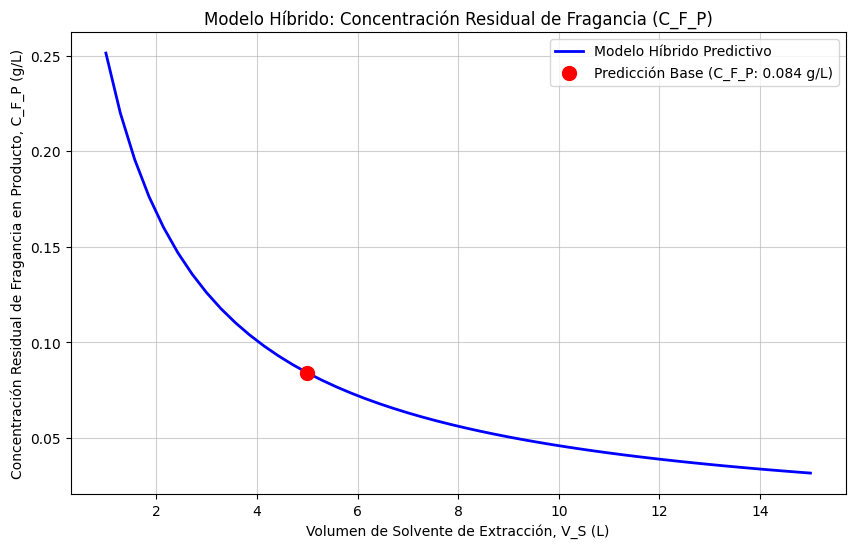

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# 1. MODELO HÍBRIDO: FUNCIÓN FENOMENOLÓGICA PREDICTIVA
#    Se integra el Kp empírico en el Balance de Masa Estático.
# =============================================================================

def modelo_hibrido_extraccion(M_F_total, V_P, V_S, Kp_emp):
    """
    Modelo híbrido predictivo para la concentración de fragancia en el producto (C_F_P).
    Se basa en el Balance de Masa Estático, utilizando la Kp empírica.

    Ecuación Fenomenológica Despejada: C_F_P = M_F_total / (V_P + V_S * Kp_emp)

    Retorna: C_F_P [g/L]
    """
    # ------------------------------------------------
    # Denominador: Representa la capacidad total del sistema para retener la fragancia
    # (Capacidad del Producto + Capacidad del Solvente)
    # ------------------------------------------------
    termino_denominador = V_P + V_S * Kp_emp

    # ------------------------------------------------
    # Balance de Masa: C_F_P = Masa Total / Capacidad total efectiva
    # ------------------------------------------------
    C_F_P = M_F_total / termino_denominador

    return C_F_P


# =============================================================================
# 2. PASO EMPÍRICO: DETERMINACIÓN DE LA CONSTANTE DE PARTICIóN (KP)
#    Se utiliza data experimental de equilibrio para cerrar el gap del modelo.
# =============================================================================

# Datos Experimentales (Mediciones en equilibrio a T=25°C)
# C_F_P: Concentración de Fragancia en el Producto (fase P) [g/L]
C_F_P_data = np.array([0.05, 0.12, 0.20, 0.35, 0.48])

# C_F_S: Concentración de Fragancia en el Solvente (fase S) [g/L]
C_F_S_data = np.array([0.49, 1.15, 2.05, 3.52, 4.70])

# Cálculo de Kp para cada prueba (Constitutiva: Kp = C_F_S / C_F_P)
Kp_individual = C_F_S_data / C_F_P_data

# Se obtiene el promedio de Kp (El valor empírico que cierra el gap)
K_P_empirica = np.mean(Kp_individual)

print(f"--- FASE 2: Cierre Empírico ---")
print(f"Valores de Kp (individuales): {Kp_individual.round(3)}")
print(f"Constante de Partición (K_P) promedio empírica: {K_P_empirica:.3f}")
print("-" * 40)
# =============================================================================
# 3. PREDICCIÓN CON NUEVAS CONDICIONES (Aplicación Industrial)
#    La Gerencia pide predecir C_F_P si aumentamos el volumen de solvente (V_S).
# =============================================================================

# Parámetros Operacionales Fijos:
M_F_total_g = 5.0  # Masa total de fragancia en el sistema [g]
V_P_litros = 10.0  # Volumen fijo de producto acuoso [L]

# Rango de Operación (Variable de Control): Volumen de Solvente (V_S)
V_S_rango = np.linspace(1, 15, 50)  # V_S variando de 1 a 15 Litros

# Predicción del Modelo Híbrido
C_F_P_prediccion = modelo_hibrido_extraccion(
    M_F_total_g,
    V_P_litros,
    V_S_rango,
    K_P_empirica
)

# Predicción para un punto específico (Ejemplo Base: V_S = 5 L)
V_S_base = 5.0
C_F_P_base = modelo_hibrido_extraccion(M_F_total_g, V_P_litros, V_S_base, K_P_empirica)


print(f"--- FASE 2: Predicción Híbrida ---")
print(f"K_P usado en el modelo fenomenológico: {K_P_empirica:.3f}")
print(f"Predicción Base (V_S={V_S_base:.1f} L): C_F_P = {C_F_P_base:.3f} g/L")
print("-" * 40)

# =============================================================================
# 4. VISUALIZACIÓN DE LA PREDICCIÓN
# =============================================================================

plt.figure(figsize=(10, 6))
plt.plot(V_S_rango, C_F_P_prediccion, label='Modelo Híbrido Predictivo', color='blue', linewidth=2)
plt.scatter(V_S_base, C_F_P_base, color='red', s=100, zorder=5, label=f'Predicción Base (C_F_P: {C_F_P_base:.3f} g/L)')

plt.title("Modelo Híbrido: Concentración Residual de Fragancia (C_F_P)")
plt.xlabel("Volumen de Solvente de Extracción, V_S (L)")
plt.ylabel("Concentración Residual de Fragancia en Producto, C_F_P (g/L)")
plt.grid(True, alpha=0.6)
plt.legend()
plt.show()

